# Temperature Documentation

## Mit Annotations

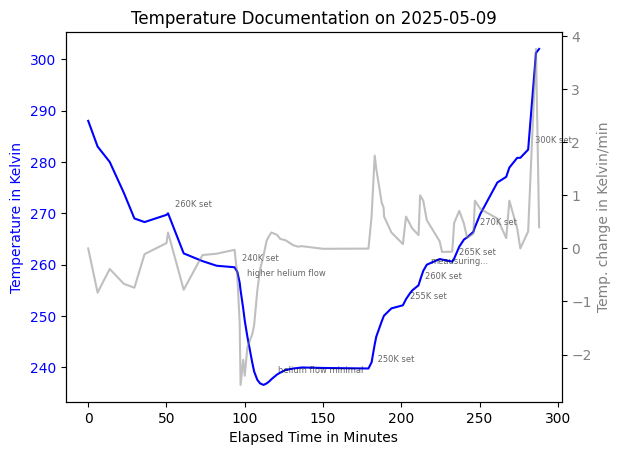

: 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Use a relative path for the CSV file
df_txt = pd.read_csv('./2025-05-09 TCBC Temperature Documentation.txt', delimiter='\t')

# Recalculate the x-axis to start at 0 minutes
df_txt["Zeit / min"] = df_txt["Zeit / min"] - df_txt["Zeit / min"].min()

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax2.set_ylabel("Temp. change in Kelvin/min", color="grey")
ax2.plot(df_txt["Zeit / min"], df_txt["K pro min"], color="grey", alpha=0.5)
ax2.tick_params(axis='y', labelcolor="grey")

ax1.set_xlabel("Elapsed Time in Minutes")
ax1.set_ylabel("Temperature in Kelvin", color="blue")
ax1.plot(df_txt["Zeit / min"], df_txt["Temp / Kelvin"], color="blue")
ax1.tick_params(axis='y', labelcolor="blue")

for idx, row in df_txt.iterrows():
    kommentar = row.get("Kommentar")
    if isinstance(kommentar, str) and kommentar.strip():
        ax1.annotate(
            kommentar,
            (row["Zeit / min"], row["Temp / Kelvin"]),
            textcoords="offset points",
            xytext=(5, 5),
            fontsize=6,
            alpha=0.6
        )

plt.title("Temperature Documentation on 2025-05-09")
plt.show()

fig.savefig("temperature_documentation.png", dpi=600)
fig.savefig("temperature_documentation.pdf", dpi=600)

#### Original
ohne annotations

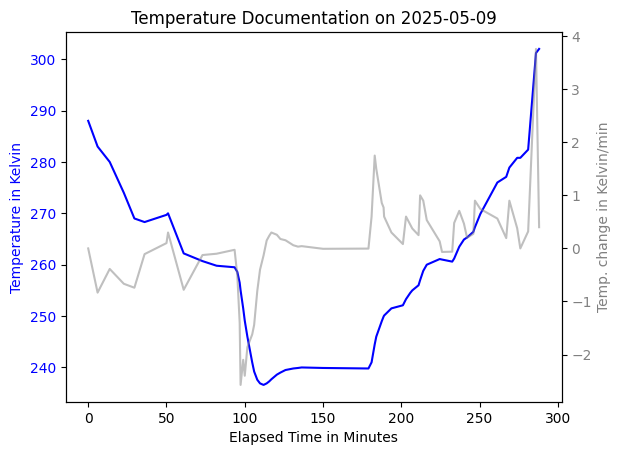

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Use a relative path for the CSV file
df_txt = pd.read_csv('./2025-05-09 TCBC Temperature Documentation.txt', delimiter='\t')

# Recalculate the x-axis to start at 0 minutes
df_txt["Zeit / min"] = df_txt["Zeit / min"] - df_txt["Zeit / min"].min()

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax2.set_ylabel("Temp. change in Kelvin/min", color="grey")
ax2.plot(df_txt["Zeit / min"], df_txt["K pro min"], color="grey", alpha=0.5)
ax2.tick_params(axis='y', labelcolor="grey")

ax1.set_xlabel("Elapsed Time in Minutes")
ax1.set_ylabel("Temperature in Kelvin", color="blue")
ax1.plot(df_txt["Zeit / min"], df_txt["Temp / Kelvin"], color="blue")
ax1.tick_params(axis='y', labelcolor="blue")

plt.title("Temperature Documentation on 2025-05-09")
plt.show()

fig.savefig("temperature_documentation.png", dpi=300)

### test ob ableitung gut so:

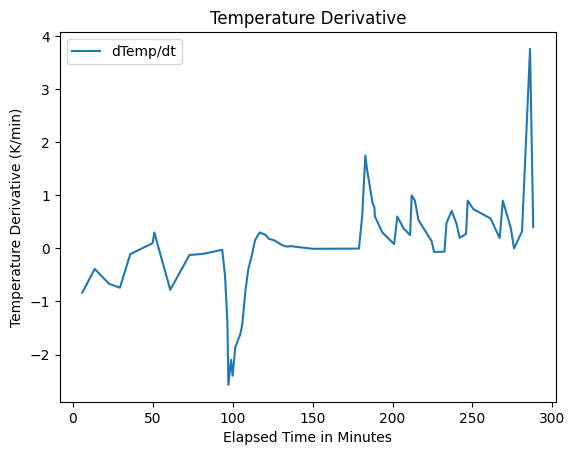

In [2]:
df_txt["dTemp/dt"] = df_txt["Temp / Kelvin"].diff() / df_txt["Zeit / min"].diff()
plt.figure()
plt.plot(df_txt["Zeit / min"], df_txt["dTemp/dt"], label="dTemp/dt")
plt.xlabel("Elapsed Time in Minutes")
plt.ylabel("Temperature Derivative (K/min)")
plt.title("Temperature Derivative")
plt.legend()
plt.show()

ja, sieht genau gleich aus